***Name:*** Amirali Mohseni



---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# 1. Image Gradients

In [91]:
#use:  scipy.ndimage.correlate
from scipy import ndimage
import matplotlib.pyplot as plt

"""
the thing is that this function returns the same size as the input and it does not add extra thing to it
mag and ori both have the same dimentions if we print out their dimensions and they will be the same size as the input.
"""

def mygradient(image):
    """
    This function takes a grayscale image and returns two arrays of the
    same size, one containing the magnitude of the gradient, the second
    containing the orientation of the gradient.
    
    
    Parameters
    ----------
    image : 2D float array of shape HxW
         An array containing pixel brightness values
    
    Returns
    -------
    mag : 2D float array of shape HxW
        gradient magnitudes
        
    ori : 2Dfloat array of shape HxW
        gradient orientations in radians
    """   
    
    x_kernel = [[-1,1]]
    y_kernel = [[-1],[1]]
    
    
    #this gives you the 
    #this is gonna give you the derivative with respect to x and y
    x_der =  ndimage.correlate(image, x_kernel, mode = "nearest")
    y_der =  ndimage.correlate(image, y_kernel, mode = "nearest")
    
    
    der_sum = (x_der)*(x_der) + (y_der)*(y_der)
    mag = np.sqrt(der_sum)
    
    
    e = 10 ** -7
    ori = np.arctan(y_der/(x_der + e))
    

    return (mag,ori)

(450, 450)
(450, 450)
(450, 450)


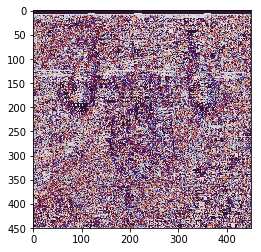

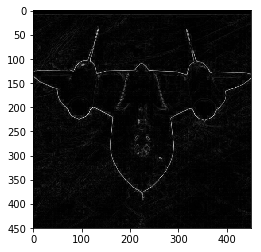

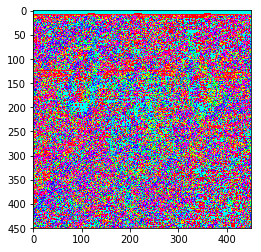

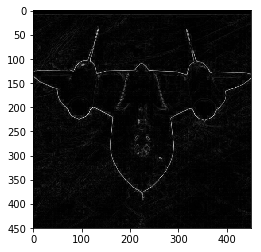

(663, 1105)
(663, 1105)
(663, 1105)


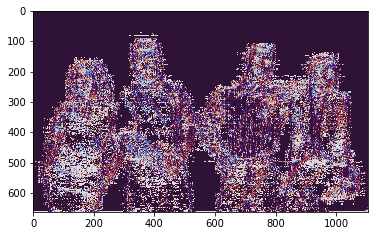

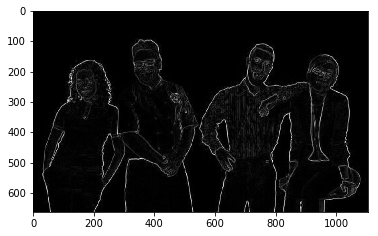

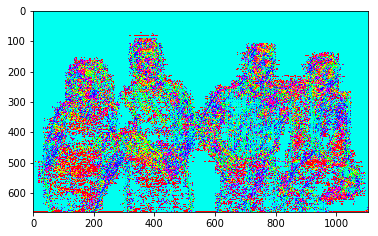

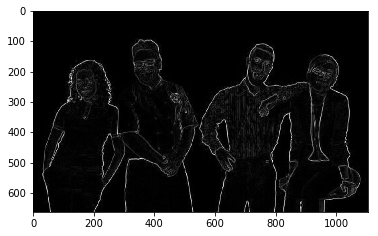

In [92]:
# using the hsv or twilight colormap.


I = plt.imread('lowRes_SR71_Blackbird.jpg')
# if (I.dtype == np.uint8):
#     I = I.astype(float) / 256 
I = np.mean(I, axis = 2)
magnitude, orientation = mygradient(I)

print(I.shape)
print(magnitude.shape)
print(orientation.shape)

plt.imshow(orientation,cmap=plt.get_cmap('twilight'))
plt.show()

plt.imshow(magnitude,cmap=plt.cm.gray)
plt.show()

plt.imshow(orientation,cmap=plt.get_cmap('hsv'))
plt.show()

plt.imshow(magnitude,cmap=plt.cm.gray)
plt.show()

I = plt.imread('faces1.jpg')
# if (I.dtype == np.uint8):
#     I = I.astype(float) / 256 
I = np.mean(I, axis = 2)
magnitude, orientation = mygradient(I)

print(I.shape)
print(magnitude.shape)
print(orientation.shape)

plt.imshow(orientation,cmap=plt.get_cmap('twilight'))
plt.show()

plt.imshow(magnitude,cmap=plt.cm.gray)
plt.show()

plt.imshow(orientation,cmap=plt.get_cmap('hsv'))
plt.show()

plt.imshow(magnitude,cmap=plt.cm.gray)
plt.show()


---

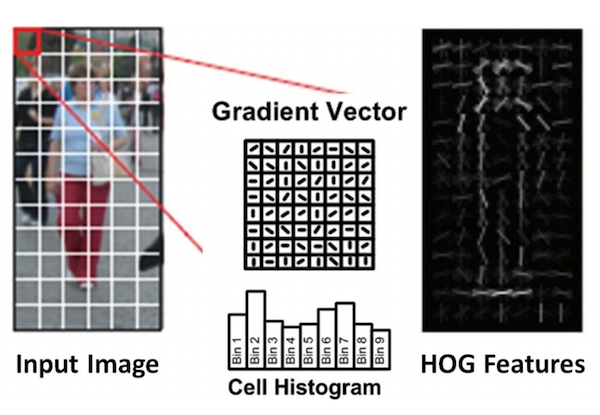

# 2. Histograms of Gradient Orientations


In [117]:
import skimage as ski 
from sklearn.preprocessing import normalize

def hog(image,bsize=8,norient=9):
    
    """
    This function takes a grayscale image and returns a 3D array
    containing the histogram of gradient orientations descriptor (HOG)
    We follow the convention that the histogram covers gradients starting
    with the first bin at -pi/2 and the last bin ending at pi/2.
    
    Parameters
    ----------
    image : 2D float array of shape HxW
         An array containing pixel brightness values
    
    bsize : int
        The size of the spatial bins in pixels, defaults to 8
        
    norient : int
        The number of orientation histogram bins, defaults to 9
        
    Returns
    -------
    ohist : 3D float array of shape (H/bsize,W/bsize,norient)
        edge orientation histogram
        
    """   
    
    # determine the size of the HOG descriptor 
    (h,w) = image.shape
    
    #h2 and w2 are actually the number of cubes of bsize x bsize we have. so we wil know how many they will be 
    h2 = int(np.ceil(h/float(bsize)))
    w2 = int(np.ceil(w/float(bsize)))
    
    #for the ohist, we have h2 big rows, and you have w2 small rows in each and you have norient columns in each small rows.
    ohist = np.zeros((h2,w2,norient))
    
    # pad the input image on right and bottom as needed so that it 
    # is a multiple of bsize
    if (h % bsize != 0 or w % bsize != 0):    
        pw = (0, bsize - (w%bsize))
        ph = (0, bsize - (h%bsize))
        image = np.pad(image,(ph,pw),'symmetric')
        
    # make sure we did the padding correctly
    assert(image.shape==(h2*bsize,w2*bsize))
    
    # compute image gradients
    (mag,ori) = mygradient(image)
    
    # choose a threshold which is 10% of the maximum gradient magnitude in the image
    thresh = 0.1 * np.amax(mag)
    
    # separate out pixels into orientation channels, dividing the range of orientations
    # [-pi/2,pi/2] into norient equal sized bins and count how many fall in each block
    # as a sanity check, make sure every pixel gets assigned to at most 1 bin.
    bincount = np.zeros((h2*bsize,w2*bsize))  
    
    for i in range(norient):
        #create a binary image containing 1s for pixels at the ith 
        #orientation where the magnitude is above the threshold.
        
        #we have to get the left and right and then we have the interval
        l =  (-np.pi/2) + i * (np.pi/norient)
        r = (-np.pi/2) + (i+1) * (np.pi/norient)
        
        #should be the same size as the bincount:
        B = (thresh <= mag ) * (ori >= l) * (ori <= r)
        
#         if (all([thresh <= mag , ori >= l, ori <= r])): 
#             B = 1
#         else :
#             B = 0

        #sanity check
        bincount = bincount + B
        
        #pull out non-overlapping bsize x bsize blocks
        chblock = ski.util.view_as_windows(B,(bsize,bsize),step=bsize)
        
        #sum up the count for each block and store the results
      #  ohist[:,:,i] = np.sum (chblock, axis = (2, 3))
    
        temp = np.zeros((h2, w2))
        for j in range (0, h2): 
            for k in range(0, w2): 
                temp[j, k] = np.count_nonzero(chblock[j][k])
        ohist[:, :, i] = temp
        
    assert(np.all(bincount<=1))
 
    # lastly, normalize the histogram so that the sum along the orientation dimension is 1
    # note: don't divide by 0! If there are no edges in a block (i.e. the sum of counts
    # is 0) then your code should leave all the values as zero. 
    
  
    for each1 in range(0, ohist.shape[0]): 
        for each2 in range(0, ohist.shape[1]):
            _sum_all = np.sum (ohist[each1][each2])
            if (_sum_all > 0): 
                for each3 in range(0, ohist.shape[2]):
                    ohist[each1, each2, each3] = ohist[each1, each2, each3] / _sum_all
                    
    
    assert(ohist.shape==(h2,w2,norient))
    
    return ohist

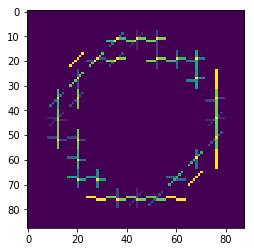

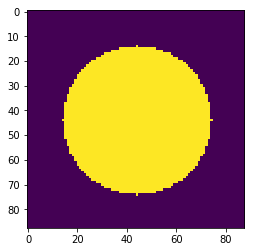

In [119]:
#provided function for visualizing hog descriptors
import hogvis as hogvis

#
# generate a simple test image... a 80x80 image
# with a circle of radius 30 in the center
#
[yy,xx] = np.mgrid[-44:44,-44:44]
im = np.array((xx*xx+yy*yy<=30*30),dtype=float)

#
# display the image and the output of hogvis
#
# I = plt.imread('/Users/amirali/Desktop/116-assignments/assignment_4/asignment4_files/images/faces/faces4.jpg')
# if (I.dtype == np.uint8):
#     I = I.astype(float) / 256 
# I = np.mean(I[0:34, 0:67], axis = 2)
#now we have the image

hog_returned = hog(im)
hogvis_returned = hogvis.hogvis(hog_returned)
#so when you have this
plt.imshow(hogvis_returned)
plt.show()

plt.imshow(im)
plt.show()




---
# 3. Detection

Write a function that takes a template and an image and returns the top detections found in the image. Your function should follow the definition given below.

In [132]:
import scipy
from scipy import ndimage
def detect(image,template,ndetect=5,bsize=8,norient=9):
    
    """
    This function takes a grayscale image and a HOG template and
    returns a list of detections where each detection consists
    of a tuple containing the coordinates and score (x,y,score)
    
    Parameters
    ----------
    image : 2D float array of shape HxW
         An array containing pixel brightness values
    
    template : a 3D float array 
        The HOG template we wish to match to the image
        
    ndetect : int
        Number of detections to return

    bsize : int
        The size of the spatial bins in pixels, defaults to 8
        
    norient : int
        The number of orientation histogram bins, defaults to 9
    
    Returns
    -------
    detections : a list of tuples of length ndetect
        Each detection is a tuple (x,y,score)
        
    """   
    
    # norient for the template should match the norient parameter passed in
    assert(template.shape[2] == norient)
    
    #first compute the histogram-of-gradient-orientation feature map for the image
    fmap = hog(image,bsize=bsize,norient=norient)
    
    #cross-correlate the template with the feature map to get the total response
    resp = np.zeros((fmap.shape[0], fmap.shape[1]))
    
    for i in range(norient):
        resp = resp + scipy.ndimage.correlate(fmap[:,:,i], template[:,:,i])
        
   # print("resp", resp)
    
    #Since the feature map and template are both three dimensional, 
    #you will want to filter each orientation separately and then sum up the results to get the final response.
    #sort the values in resp in ascending order.
    # val[i] should be ith largest score in resp
    # ind[i] should be the index at which it occurred so that val[i]==resp[ind[i]]
    
    val = np.sort(resp.flatten())[::-1] #sorted response values
  #  print("val", val)
    ind = np.argsort(resp.flatten())[::-1]
    
#     for i_value in val: 
#         for j_index, j_value in enumerate (resp) : 
#             if (i_value == j_value) : 
#                 ind.append(j_index)
    
    #work down the list of responses from high to low, to generate a 
    # list of ndetect top scoring matches which do not overlap
    detcount = 0
    i = 0
    detections = []
    while ((detcount < ndetect) and (i < len(val))):
        # convert 1d index into 2d index
        
#         yb = np.unravel_index(ind[i] , fmap.shape)[0]
#         xb = np.unravel_index(ind[i] , fmap.shape)[1]
        
        yb, xb = np.unravel_index(ind[i] , (fmap.shape[0], fmap.shape[1] ))
    #    print("xb", xb)
    
        #assert(val[i]==resp[yb,xb]) #make sure we did indexing correctly
        
        #convert block index to pixel coordinates based on bsize
        xp = xb * bsize
        yp = yb * bsize
        
        
        #check if this detection overlaps any detections that we've already added
        #to the list. compare the x,y coordinates of this detection to the x,y 
        #coordinates of the detections already in the list and see if any overlap
        #by checking if the distance between them is less than 70% of the template
        # width/height
        #if they both less then it is true : 
            
        
        overlap = False
        temp_h = (0.7)  * template.shape[0]
        temp_w = (0.7)  * template.shape[1]
        
        for j in range(len(detections)): 
                
            distx = abs(xp - detections[j][0])
            disty = abs(yp - detections[j][1])
            
            if ( distx <= temp_w or disty <= temp_h)  : 
                overlap = True
                break
                
        if not overlap:
            detcount = detcount + 1
            detections.append((xp,yp,val[i]))
                
#         print("distx", distx)
#         print("disty", disty)
#         print("temp_w", temp_w)
#         print("temp_h", temp_h)
    
        
        #if the detection doesn't overlap then add it to the list
        i=i+1
    
    if (len(detections) < ndetect):
        print('WARNING: unable to find ',ndetect,' non-overlapping detections')
        
    return detections


In [133]:
import matplotlib.patches as patches

def plot_detections(image,detections,tsize_pix):
    """
    This is a utility function for visualization that takes an image and
    a list of detections and plots the detections overlayed on the image
    as boxes.
    
    Color of the bounding box is based on the order of the detection in
    the list, fading from green to red.
    
    Parameters
    ----------
    image : 2D float array of shape HxW
         An array containing pixel brightness values
    
    detections : a list of tuples of length ndetect
        Detections are tuples (x,y,score)

    tsize_pix : (int,int)
        The height and width of the box in pixels
    
    Returns
    -------
    None
    
    """           
    ndetections = len(detections)
    
    plt.imshow(image)
    ax = plt.gca()
    w = tsize_pix[1]
    h = tsize_pix[0]
    red = np.array([1,0,0])
    green = np.array([0,1,0])
    ct = 0
    for (x,y,score) in detections:
        xc = x-(w//2)
        yc = y-(h//2)
        col = (ct/ndetections)*red + (1-(ct/ndetections))*green
        rect = patches.Rectangle((xc,yc),w,h,linewidth=3,edgecolor=col,facecolor='none')
        ax.add_patch(rect)
        ct = ct + 1
        
    plt.show()

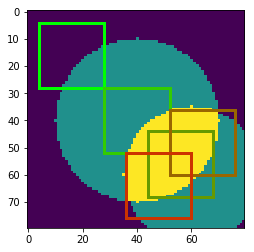

In [134]:
#
# sketch of some simple test code, modify as needed
#

#create a synthetic image
[yy,xx] = np.mgrid[-40:40,-40:40]
im1 = np.array((xx*xx+yy*yy<=30*30),dtype=float)
[yy,xx] = np.mgrid[-60:20,-60:20]
im2 = np.array((xx*xx+yy*yy<=25*25),dtype=float)
im = 0.5*im1+0.5*im2

#compute feature map with default parameters
fmap = hog(im)

#extract a 3x3 template
template = fmap[1:4,1:4,:]

#run the detect code
detections = detect(im,template,ndetect=5)
    
#visualize results. 
plot_detections(im,detections,(24,24))

# visually confirm that:
#   1. top detection should be the same as the location where we selected the template
#   2. multiple detections do not overlap too much

---
# 4. Learning Templates

The final step is to implement a function to learn a template from positive and negative examples. Your code should take a collection of cropped positive and negative examples of the object you are interested in detecting, extract the features for each, and generate a template by taking the average positive template minus the average negative template.

In [135]:
def learn_template(posfiles,negfiles,tsize=np.array([16,16]),bsize=8,norient=9):
    """
    This function takes a list of positive images that contain cropped
    examples of an object + negative files containing cropped background
    and a template size. It produces a HOG template and generates visualization
    of the examples and template
    
    Parameters
    ----------
    posfiles : list of str
         Image files containing cropped positive examples
    
    negfiles : list of str
        Image files containing cropped negative examples

    tsize : (int,int)
        The height and width of the template in blocks
    
    Returns
    -------
    template : float array of size tsize x norient
        The learned HOG template
    
    """           
    
    #compute the template size in pixels 
    #corresponding to the specified template size (given in blocks)
    tsize_pix=bsize*tsize

    #figure to show positive training examples
    fig1 = plt.figure()
    pltct = 1

    #accumulate average positive and negative templates
    pos_t = np.zeros((tsize[0],tsize[1],norient),dtype=float) 
    for file in posfiles:
        #load in a cropped positive example
        img = plt.imread(file)
        if (img.dtype == np.uint8):
            img = img.astype(float) / 256

    
        #convert to grayscale and resize to fixed dimension tsize_pix
        #using skimage.transform.resize if needed.
        img = np.mean(img, axis = 2)
        img = ski.transform.resize(img, tsize_pix)

        #display the example if you want to train with a large # of examples, 
        #you may want to modify this, e.g. to show only the first 5.
        ax = fig1.add_subplot(len(posfiles),1,pltct)
        ax.imshow(img,cmap=plt.cm.gray)
        pltct = pltct + 1
        
        #extract feature
        fmap = hog(img)

        #compute running average
        pos_t = pos_t + fmap

    pos_t = (1/len(posfiles))*pos_t
    fig1.show()
    
    # repeat same process for negative examples
    fig2 = plt.figure()
    pltct = 1  
    neg_t = np.zeros((tsize[0],tsize[1],norient),dtype=float) 
    for file in negfiles:

        #load in a cropped positive example
        img = plt.imread(file)
        if (img.dtype == np.uint8):
            img = img.astype(float) / 256
            
        #convert to grayscale and resize to fixed dimension tsize_pix
        #using skimage.transform.resize if needed.
        img = np.mean(img, axis = 2)
        img = ski.transform.resize(img, tsize_pix)
        
        
        ax = fig2.add_subplot(len(negfiles),1,pltct)
        ax.imshow(img,cmap=plt.cm.gray)
        pltct = pltct + 1
        
        fmap = hog(img)
        neg_t = neg_t + fmap

    neg_t = (1/len(negfiles))*neg_t
    fig2.show()

    # add code here to visualize the positive and negative parts of the template
    # using hogvis. you should separately visualize pos_t and neg_t rather than
    # the final tempalte.
    
 

    # now construct our template as the average positive minus average negative
    template = pos_t - neg_t

    
    return template 


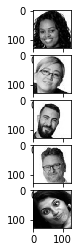

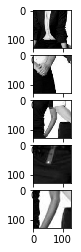

In [136]:
face = ["face/1.png", "face/2.png", "face/3.png", "face/4.png", "faceonlyface/5.png"]
face_not = ["face_no/1.png", "face_no/2.png", "face_no/3.png", "face_no/4.png", "face_no/5.png"]

returned = learn_template(face,face_not)



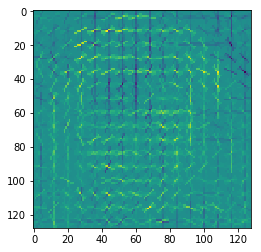

In [137]:
re = hogvis.hogvis(returned)
plt.imshow(re)
plt.show()

---
# 5. Experiments

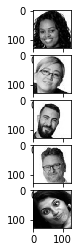

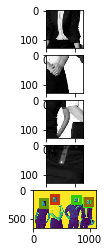

In [161]:
# assume template is 16x16 blocks, you may want to adjust this 
# for objects of different size or aspect ratio.
# compute image a template size
bsize=8
tsize=np.array([16,16])  #height and width in blocks
tsize_pix = bsize*tsize  #height and width in pixels

face = ["face/1.png", "face/2.png", "face/3.png", "face/4.png", "face/5.png"]
face_not = ["face_no/1.png", "face_no/2.png", "face_no/3.png", "face_no/4.png", "face_no/5.png"]

# call learn_template to learn and visualize the template and training data
#temp = learn_template(face,face_not,tsize=tsize)
               
# call detect on one or more test images, visualizing the result with the plot_detections function

# ...

template = learn_template(face, face_not)

img = plt.imread("faces/faces1.jpg")
img = np.mean(img, axis = 2)
detections = detect(img, template)

plot_detections(img,detections,tsize_pix)


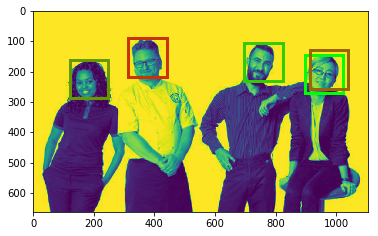

In [162]:
plot_detections(img,detections,tsize_pix)

### Experiment 1: Face detection

## Experiment 2: 

AssertionError: 

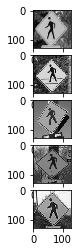

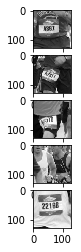

In [158]:
# assume template is 16x16 blocks, you may want to adjust this 
# for objects of different size or aspect ratio.
# compute image a template size
bsize=15
tsize=np.array([16,16])  #height and width in blocks
tsize_pix = bsize*tsize  #height and width in pixels

sign = ["sign/1.png", "sign/2.png", "sign/3.png", "sign/4.png", "sign/5.png"]
sign_no = ["sign_no/1.png", "sign_no/2.png", "sign_no/3.png", "sign_no/4.png", "sign_no/5.png"]

# call learn_template to learn and visualize the template and training data
#temp = learn_template(face,face_not,tsize=tsize)
               
# call detect on one or more test images, visualizing the result with the plot_detections function

# ...

template = learn_template(sign, sign_no)

img = plt.imread("signs/test0.jpg")
img = np.mean(img, axis = 2)
detections = detect(img, template)

plot_detections(img,detections,tsize_pix)

In [ ]:
plot_detections(img,detections,tsize_pix)

this function that it will work better if we have a large amount of samples, and we can then average them all together and
be able to have a good picture of what we are looking for. what I think would be a great idea to make it more efficient is that we can 
make the size of the window more reasonable so it can capture the goal part better. 
this might fail if the picture we have is somehow unreasonably unshaped and even the samples would not help find it. It is really important
have a huge amount of samples so our function can "learn" better and can find the object faster. I would suggest that we can 
also consider the brightness whcih playes an important role in the whole thing. In fact, an object can be only associated with a specific 
color which is going to help our function find that object better. for example, we all know that the signs are usually yellow and those that are not yellow are ignored. in this case we can average the color and find a good way to find the close images. 